In [1]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', 100)

#These two modules will be used to create some basic visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#This is a jupyter magic command that embeds the image generated by matplotlib right after the code cell
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
#charts_df.head()

# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
#tracks_df.head()

# read and process the tracks dataset
artists_df = pd.read_csv('data/spotify_daily_charts_artists.csv')
artists_df = artists_df.rename(columns={'popularity':'artist_popularity'})
#artists_df.head()

#merge the charts and tracks dataset
df = charts_df.merge(tracks_df, on='track_id', how='left')
df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})
df = df.merge(artists_df, on='artist_id', how='left')
df = df.drop(columns='artist_name_y')
df = df.rename(columns={'artist_name_x':'artist_name'})
df = df.set_index('date')
df=df.dropna()
#df.head()

In [3]:
edm_df = df[df['genres'].str.contains('edm')]
edm_tracks = edm_df.drop_duplicates(subset='track_id')

edm_artists = edm_df.groupby('artist')[['streams']].sum().sort_values(by='streams', ascending =False)

songs_artist = edm_tracks['artist'].value_counts().to_frame().reset_index().rename(columns = {'artist':'no. of songs', 'index':'artist'})
#songs_artist

#top 10 edm artists + david guetta
edm_artists = edm_artists.merge(songs_artist, 'inner', 'artist')[:11]
#edm_artists

,artist,streams,no. of songs
0,The Chainsmokers,224495504,48
1,Marshmello,101445842,12
2,Jonas Blue,94736448,18
3,Zedd,91168726,9
4,Clean Bandit,68995191,5
5,Martin Garrix,66390498,11
6,Kygo,55572844,17
7,DJ Snake,51841117,6
8,Calvin Harris,48893096,15
9,Cheat Codes,38144287,6


# David  Guetta Performance

# Guetta Charted vs Uncharted

In [4]:
# Guetta Charted vs Uncharted

# read and process the playlist data for keyword
tracks1_df = edm_tracks[edm_tracks.artist=='David Guetta']
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']='David Guetta'
#tracks1_df.head()

###################### set keyword
KEYWORD2='david guetta playlist'

# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_data.csv')
# playlist2_df.head(20)

# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2

tracks2_df = tracks2_df[(tracks2_df['artist_name']=='David Guetta') | (tracks2_df['track_name'].str.contains('David Guetta'))]
# tracks2_df[['track_name','artist_name','release_date']]

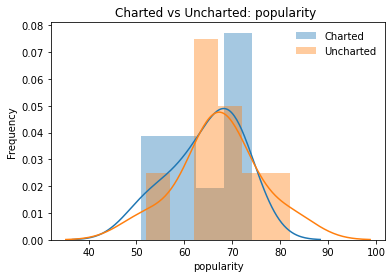

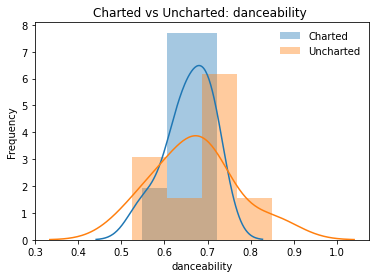

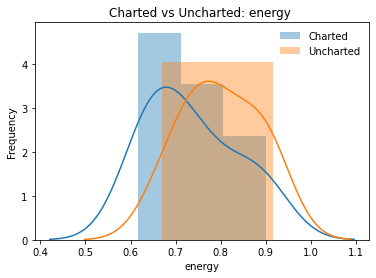

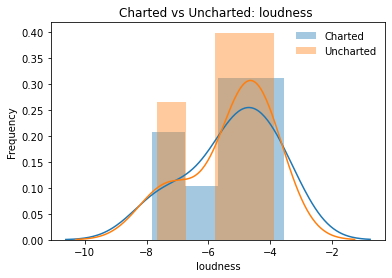

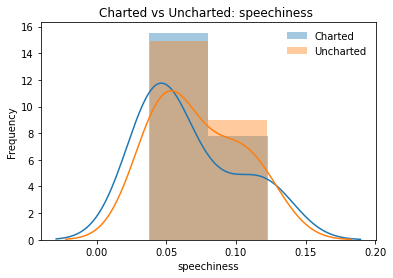

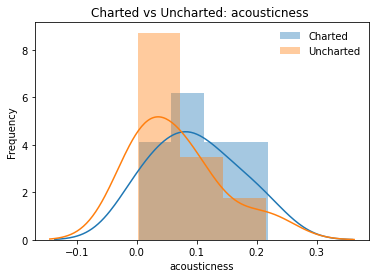

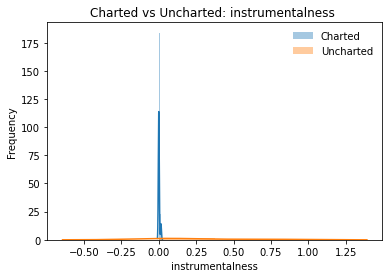

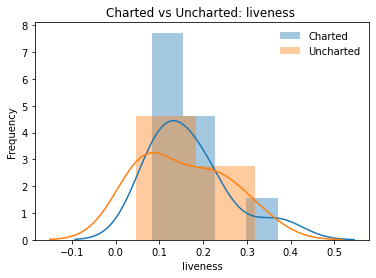

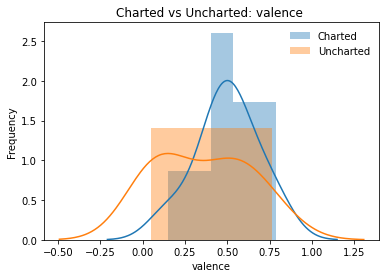

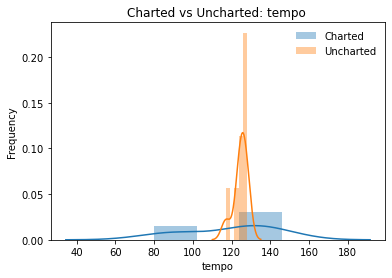

In [5]:
# Guetta Charted vs Uncharted

for col in ['popularity', 'danceability', 'energy', 
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']: #'key', 'mode',
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= 'Charted')
    sns.distplot(tracks2_df[col], ax=ax, label= 'Uncharted')
    plt.title("%s vs %s: %s " % ('Charted','Uncharted',col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()

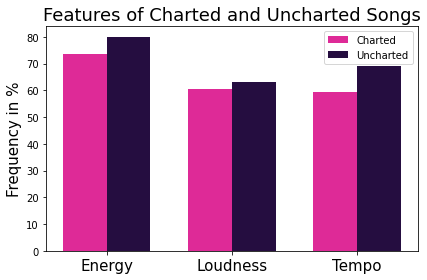

In [6]:
# Guetta Charted vs Uncharted

#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks1_df['loudness'] = scaler.fit_transform(tracks1_df[['loudness']])
tracks1_df['tempo'] =  scaler.fit_transform(tracks1_df[['tempo']])
tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


set1_means = []
set2_means = []

for col in ['energy', 'loudness', 'tempo']:
    
    set1_means.append(tracks1_df[col].mean()*100)
    set2_means.append(tracks2_df[col].mean()*100)

labels = ['Energy', 'Loudness', 'Tempo']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label='Charted', color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='Uncharted', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency in %',fontsize=15)
ax.set_title('Features of Charted and Uncharted Songs', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

# David Guetta: Existing Songs vs Charting Songs
##### Stacked Bar Chart

In [7]:
# David Guetta: Existing Songs vs Charting Songs

# read and process the playlist data for keyword
tracks1_df = edm_tracks[edm_tracks.artist=='David Guetta']
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']='David Guetta'
#tracks1_df.head()

###################### set keyword
KEYWORD2='david guetta'

# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_data.csv')
# playlist2_df.head(20)

# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')

#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2

tracks2_df = tracks2_df[(tracks2_df['artist_name']=='David Guetta') | (tracks2_df['track_name'].str.contains('David Guetta'))].drop_duplicates(subset='track_id')
#tracks2_df[['track_name','artist_name','release_date']]

In [8]:
# David Guetta: Existing Songs vs Charting Songs

#Creating Dataframe
dg_date1 = tracks1_df[['release_date','track_id', 'track_name','artist_name']].reset_index()
del dg_date1['date']

dg_date2 = tracks2_df[['release_date','track_id', 'track_name','artist_name']].reset_index()
del dg_date2['index']
dg_date =dg_date1.merge(dg_date2, on=['release_date','track_id', 'track_name','artist_name'], how='outer')

dg_date['release_date'] = pd.to_datetime(dg_date['release_date'])
dg_date1['release_date'] = pd.to_datetime(dg_date1['release_date'])
#dg_date

#total existing songs
total_songs = pd.DataFrame([[2017,0],[2018,0],[2019,0],[2020,0],[2021,0]])
total_songs.columns = ['year', 'total_songs']
prev_val=(dg_date.release_date.dt.year>2017).sum()

for yr in range(len(total_songs.year)):
    total_songs.total_songs.loc[yr] = prev_val + \
    (dg_date.release_date.dt.year==total_songs.year.loc[yr]).sum()
    prev_val=total_songs.total_songs.loc[yr]
    
#Number Charting Songs
num_charted = pd.DataFrame([[2017,0],[2018,0],[2019,0],[2020,0],[2021,0]])
num_charted.columns = ['year', 'total_songs']

for yr in range(len(total_songs.year)):
    num_charted.total_songs.loc[yr] = (dg_date1.release_date.dt.year==total_songs.year.loc[yr]).sum()
    
# total_songs
# num_charted

No handles with labels found to put in legend.


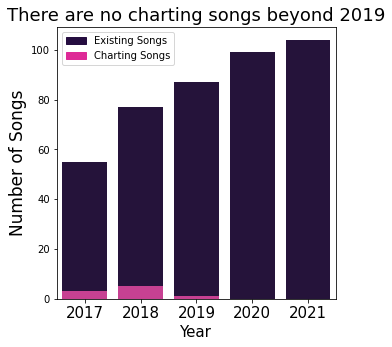

In [9]:
# David Guetta: Existing Songs vs Charting Songs

# import libraries
import matplotlib.patches as mpatches

# set the figure size
plt.figure(figsize=(5, 5))

# bar chart 1 -> top bars
bar1 = sns.barplot(x="year",  y="total_songs", data=total_songs, color="#250D40")

# bar chart 2 -> bottom bars
bar2 = sns.barplot(x="year", y="total_songs", data=num_charted, color="#DE2A97")

labels = ['2017', '2018', '2019', '2020', '2021']
x = np.arange(len(labels))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Number of Songs',fontsize=17)
plt.title('There are no charting songs beyond 2019', fontsize=18)
plt.xticks(x,labels,rotation = 0, fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.legend()

# add legend
top_bar = mpatches.Patch(color="#250D40", label='Existing Songs')
bottom_bar = mpatches.Patch(color="#DE2A97", label='Charting Songs')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

# David Guetta vs Top 10 Streamed EDM Artists

In [10]:
#David Guetta vs Top 10 Streamed EDM Artists

# read and process the playlist data for keyword
tracks1_df = edm_tracks[edm_tracks.artist=='David Guetta']
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']='David Guetta'
#tracks1_df.head()

# read and process the playlist data for keyword
tracks2_df = edm_tracks[edm_tracks.artist!='David Guetta']
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']= 'Other EDM Artists'
#tracks2_df.head()

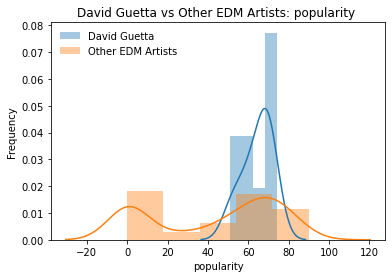

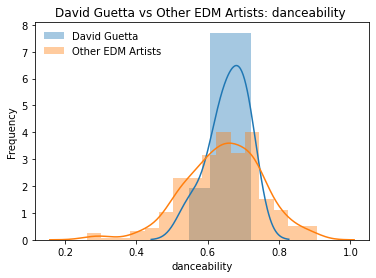

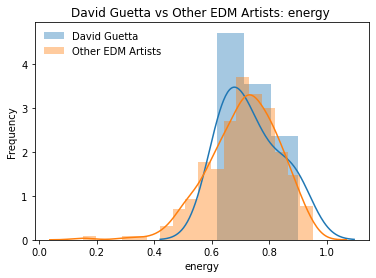

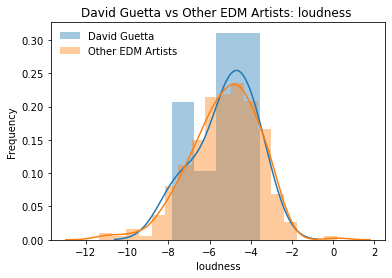

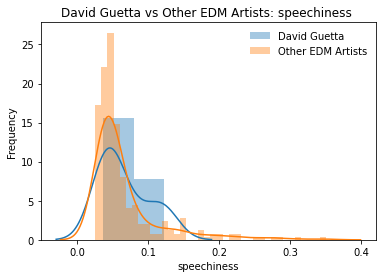

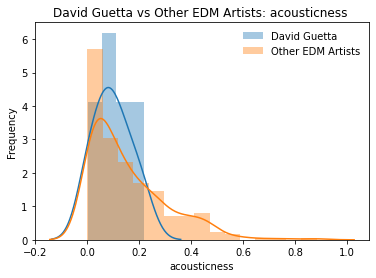

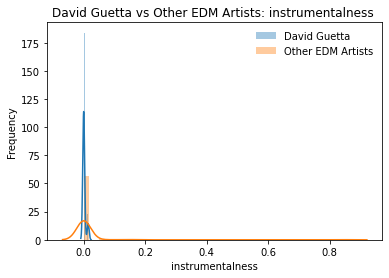

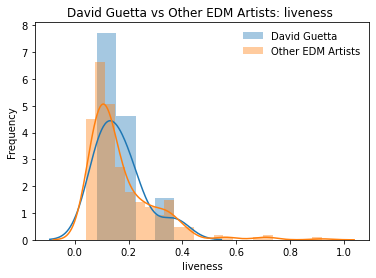

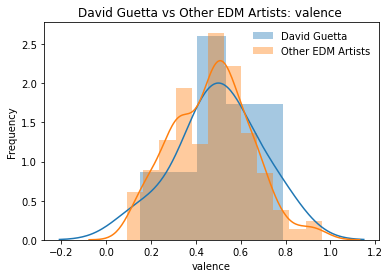

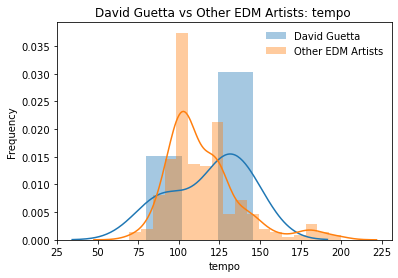

In [11]:
#David Guetta vs Top 10 Streamed EDM Artists

for col in ['popularity', 'danceability', 'energy', 
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']: #'key', 'mode',
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= 'David Guetta')
    sns.distplot(tracks2_df[col], ax=ax, label= 'Other EDM Artists')
    plt.title("%s vs %s: %s " % ('David Guetta','Other EDM Artists',col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()

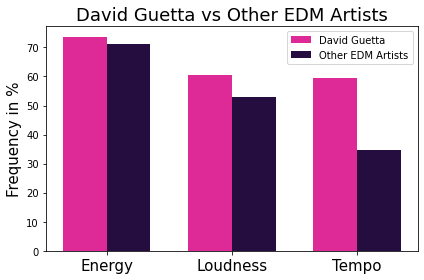

In [12]:
#David Guetta vs Top 10 Streamed EDM Artists

#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks1_df['loudness'] = scaler.fit_transform(tracks1_df[['loudness']])
tracks1_df['tempo'] =  scaler.fit_transform(tracks1_df[['tempo']])
tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


set1_means = []
set2_means = []

for col in ['energy', 'loudness', 'tempo']:
    
    set1_means.append(tracks1_df[col].mean()*100)
    set2_means.append(tracks2_df[col].mean()*100)

labels = ['Energy', 'Loudness', 'Tempo']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label='David Guetta', color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='Other EDM Artists', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency in %',fontsize=15)
ax.set_title('David Guetta vs Other EDM Artists', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

# David Guetta vs Top 10 Streamed EDM songs

In [13]:
#David Guetta vs Top 10 Streamed EDM songs

top_edm_tracks = edm_df.groupby(['track_id', 'track_name','artist'])[['streams']].sum().sort_values(by = 'streams', ascending=False).reset_index()[:10]
top_edm_tracks = edm_df[edm_df.track_id.apply(lambda x: x in top_edm_tracks.track_id.tolist())]

# read and process the playlist data for keyword
tracks1_df = edm_tracks[edm_tracks.artist=='David Guetta']
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']='David Guetta'
#tracks1_df.head()

# read and process the playlist data for keyword
tracks2_df = top_edm_tracks.drop_duplicates(subset='track_id')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']= 'Top EDM Songs'
#tracks2_df.head()

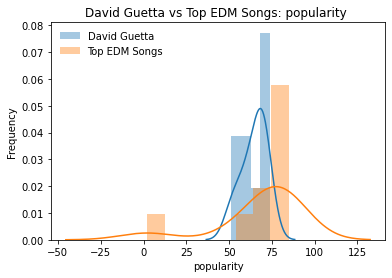

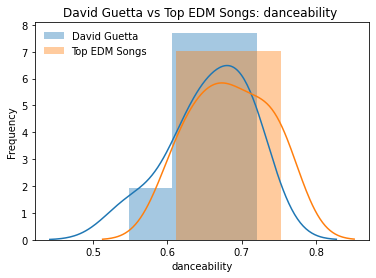

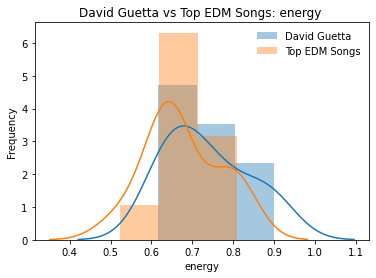

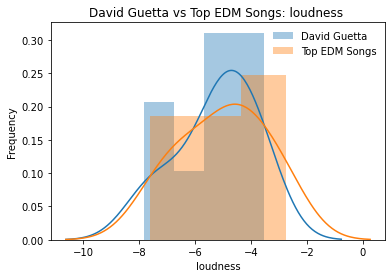

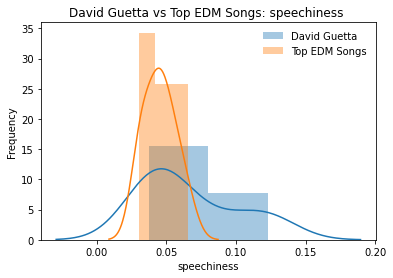

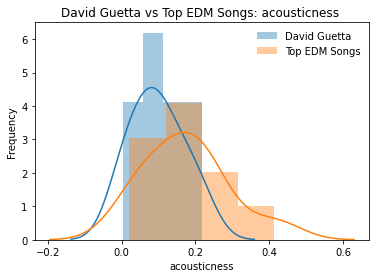

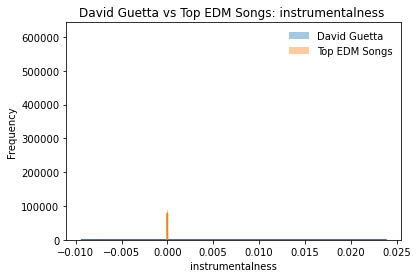

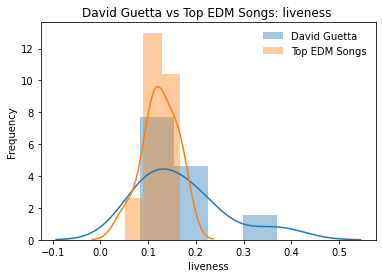

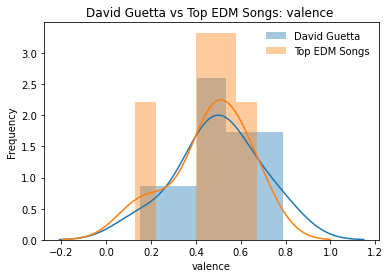

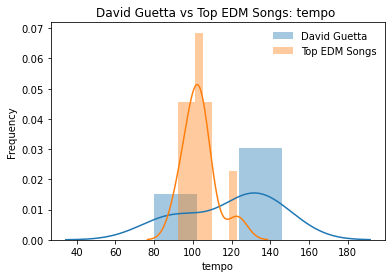

In [14]:
#David Guetta vs Top 10 Streamed EDM songs

for col in ['popularity', 'danceability', 'energy', 
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']: #'key', 'mode',
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= 'David Guetta')
    sns.distplot(tracks2_df[col], ax=ax, label= 'Top EDM Songs')
    plt.title("%s vs %s: %s " % ('David Guetta','Top EDM Songs',col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()

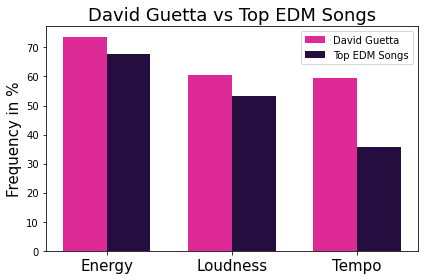

In [15]:
#David Guetta vs Top 10 Streamed EDM songs

#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks1_df['loudness'] = scaler.fit_transform(tracks1_df[['loudness']])
tracks1_df['tempo'] =  scaler.fit_transform(tracks1_df[['tempo']])
tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


set1_means = []
set2_means = []

for col in ['energy', 'loudness', 'tempo']:
    
    set1_means.append(tracks1_df[col].mean()*100)
    set2_means.append(tracks2_df[col].mean()*100)

labels = ['Energy', 'Loudness', 'Tempo']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label='David Guetta', color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='Top EDM Songs', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency in %',fontsize=15)
ax.set_title('David Guetta vs Top 10 EDM Songs', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

# Streams: Solo Artists vs with Collaboration

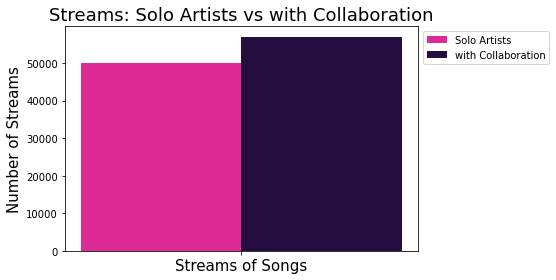

In [16]:
# Streams: Solo Artists vs with Collaboration

ft = df[(df.track_name.str.contains('feat'))|(df.track_name.str.contains('with'))|
            (df.track_name.str.contains('ft'))].streams.mean()

solo = df[~((df.track_name.str.contains('feat'))|(df.track_name.str.contains('with'))|
            (df.track_name.str.contains('ft')))].streams.mean()

set1_means = [solo]
set2_means = [ft]

labels = ['Streams of Songs']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label='Solo Artists', color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='with Collaboration', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Streams',fontsize=15)
ax.set_title('Streams: Solo Artists vs with Collaboration', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()